In [26]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd


In [143]:
csv_file = "Resources/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020-new.csv"
csv_file2 = "Resources/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv"

cdc_df = pd.read_csv(csv_file)
cdc_df2 = pd.read_csv(csv_file2)

cdc_df = cdc_df[['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week', 'Week Ending Date', 'All Cause', 'Natural Cause', 'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)', 'Influenza and pneumonia (J10-J18)', 'Chronic lower respiratory diseases (J40-J47)', 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)', 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)', 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Cerebrovascular diseases (I60-I69)', 'COVID-19 (U071, Multiple Cause of Death)', 'COVID-19 (U071, Underlying Cause of Death)']]
cdc_df2 = cdc_df2[['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week', 'Week Ending Date', 'All  Cause', 'Natural Cause', 'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)', 'Influenza and pneumonia (J10-J18)', 'Chronic lower respiratory diseases (J40-J47)', 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)', 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)', 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Cerebrovascular diseases (I60-I69)']]
cdc_df2

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69)
0,Alabama,2014,1,01/04/2014,355,327,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0
1,Alabama,2014,2,01/11/2014,872,792,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0
2,Alabama,2014,3,01/18/2014,1044,971,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0
3,Alabama,2014,4,01/25/2014,1022,967,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0
4,Alabama,2014,5,02/01/2014,1040,953,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13828,Wyoming,2018,48,12/01/2018,106,94,NaN,22.0,NaN,10.0,NaN,NaN,NaN,NaN,0.0,20.0,NaN
13829,Wyoming,2018,49,12/08/2018,92,80,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
13830,Wyoming,2018,50,12/15/2018,101,92,0.0,19.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,31.0,NaN
13831,Wyoming,2018,51,12/22/2018,105,95,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.0,NaN


In [144]:
cdc2014_df = cdc_df2.loc[cdc_df2['MMWR Year'] == 2014]
cdc2015_df = cdc_df2.loc[cdc_df2['MMWR Year'] == 2015]
cdc2016_df = cdc_df2.loc[cdc_df2['MMWR Year'] == 2016]
cdc2017_df = cdc_df2.loc[cdc_df2['MMWR Year'] == 2017]
cdc2018_df = cdc_df2.loc[cdc_df2['MMWR Year'] == 2018]
cdc2019_df = cdc_df.loc[cdc_df['MMWR Year'] == 2019]
cdc2020_df = cdc_df.loc[cdc_df['MMWR Year'] == 2020]
cdc2018_df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69)
209,Alabama,2018,1,01/06/2018,1248,1159,31.0,212.0,34.0,66.0,44.0,109.0,18.0,19.0,30.0,320.0,59.0
210,Alabama,2018,2,01/13/2018,1301,1215,20.0,206.0,28.0,64.0,68.0,98.0,26.0,23.0,36.0,331.0,76.0
211,Alabama,2018,3,01/20/2018,1275,1190,29.0,210.0,25.0,61.0,67.0,89.0,21.0,21.0,30.0,347.0,58.0
212,Alabama,2018,4,01/27/2018,1286,1208,37.0,215.0,34.0,83.0,64.0,99.0,25.0,28.0,21.0,288.0,81.0
213,Alabama,2018,5,02/03/2018,1147,1058,23.0,219.0,22.0,52.0,58.0,86.0,16.0,17.0,20.0,276.0,66.0


In [145]:
week1_2014disease = cdc2014_df.groupby('MMWR Week').sum()
week1_2015disease = cdc2015_df.groupby('MMWR Week').sum()
week1_2016disease = cdc2016_df.groupby('MMWR Week').sum()
week1_2017disease = cdc2017_df.groupby('MMWR Week').sum()
week1_2018disease = cdc2018_df.groupby('MMWR Week').sum()
week1_2019disease = cdc2019_df.groupby('MMWR Week').sum()
week1_2020disease = cdc2020_df.groupby('MMWR Week').sum()


week1_2014disease


,MMWR Year,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69)
MMWR Week,,,,,,,,,,,,,,
1,106742,31187,28907,346.0,6439.0,903.0,959.0,849.0,1936.0,288.0,432.0,247.0,7551.0,1509.0
2,106742,56285,52360,833.0,11463.0,1722.0,1876.0,1836.0,3403.0,749.0,1014.0,557.0,13616.0,2680.0
3,106742,55260,51485,864.0,11566.0,1650.0,1882.0,1871.0,3334.0,710.0,1001.0,463.0,13019.0,2676.0
4,106742,54760,51060,803.0,11706.0,1583.0,1828.0,1727.0,3416.0,661.0,987.0,523.0,12902.0,2701.0
5,106742,54573,50870,808.0,11666.0,1560.0,1874.0,1598.0,3266.0,633.0,921.0,549.0,13002.0,2662.0
6,106742,54016,50269,773.0,11441.0,1618.0,1834.0,1485.0,3334.0,642.0,968.0,534.0,12781.0,2628.0
7,106742,54490,50700,792.0,11572.0,1623.0,1815.0,1414.0,3257.0,629.0,959.0,543.0,13104.0,2642.0
8,106742,53325,49520,636.0,11580.0,1581.0,1768.0,1220.0,3028.0,656.0,882.0,533.0,12672.0,2761.0
9,106742,52314,48399,727.0,11365.0,1580.0,1740.0,1158.0,2995.0,597.0,960.0,473.0,12325.0,2595.0


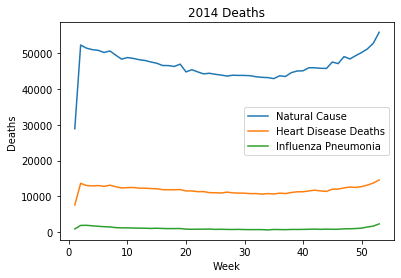

In [166]:
death2014 = week1_2014disease[['All  Cause', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J10-J18)']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Deaths')
ax1.set_xlabel('Week')
ax1.set_title('2014 Deaths')
plt.plot(week1_2014disease['Natural Cause'], label="Natural Cause")
plt.plot(week1_2014disease['Diseases of heart (I00-I09,I11,I13,I20-I51)'], label="Heart Disease Deaths")
plt.plot(week1_2014disease['Influenza and pneumonia (J10-J18)'], label="Influenza Pneumonia")
ax1.legend();
plt.savefig('Resources/2014-cdc.png')

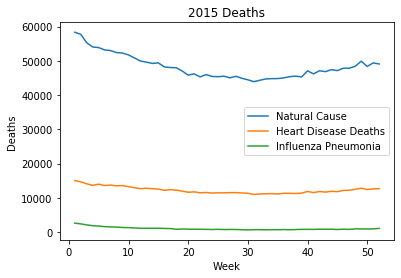

In [165]:
death2015 = week1_2015disease[['All  Cause', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J10-J18)']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Deaths')
ax1.set_xlabel('Week')
ax1.set_title('2015 Deaths')
plt.plot(week1_2015disease['Natural Cause'], label="Natural Cause")
plt.plot(week1_2015disease['Diseases of heart (I00-I09,I11,I13,I20-I51)'], label="Heart Disease Deaths")
plt.plot(week1_2015disease['Influenza and pneumonia (J10-J18)'], label="Influenza Pneumonia")
ax1.legend();
plt.savefig('Resources/2015-cdc.png')

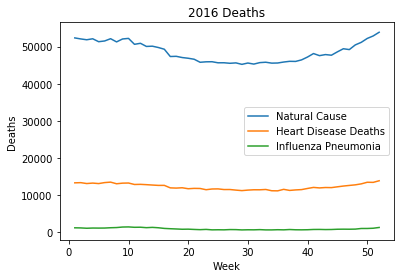

In [164]:
death2016 = week1_2016disease[['All  Cause', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J10-J18)']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Deaths')
ax1.set_xlabel('Week')
ax1.set_title('2016 Deaths')
plt.plot(week1_2016disease['Natural Cause'], label="Natural Cause")
plt.plot(week1_2016disease['Diseases of heart (I00-I09,I11,I13,I20-I51)'], label="Heart Disease Deaths")
plt.plot(week1_2016disease['Influenza and pneumonia (J10-J18)'], label="Influenza Pneumonia")
ax1.legend();
plt.savefig('Resources/2016-cdc.png')

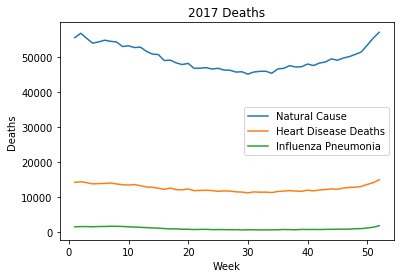

In [163]:
death2017 = week1_2017disease[['All  Cause', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J10-J18)']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Deaths')
ax1.set_xlabel('Week')
ax1.set_title('2017 Deaths')
plt.plot(week1_2017disease['Natural Cause'], label="Natural Cause")
plt.plot(week1_2017disease['Diseases of heart (I00-I09,I11,I13,I20-I51)'], label="Heart Disease Deaths")
plt.plot(week1_2017disease['Influenza and pneumonia (J10-J18)'], label="Influenza Pneumonia")
ax1.legend();
plt.savefig('Resources/2017-cdc.png')

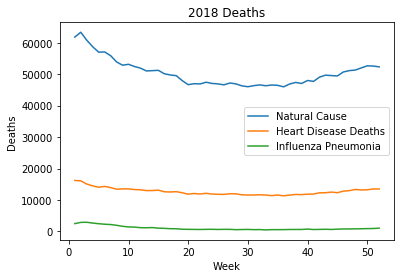

In [162]:
death2018 = week1_2018disease[['All  Cause', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J10-J18)']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Deaths')
ax1.set_xlabel('Week')
ax1.set_title('2018 Deaths')
plt.plot(week1_2018disease['Natural Cause'], label="Natural Cause")
plt.plot(week1_2018disease['Diseases of heart (I00-I09,I11,I13,I20-I51)'], label="Heart Disease Deaths")
plt.plot(week1_2018disease['Influenza and pneumonia (J10-J18)'], label="Influenza Pneumonia")
ax1.legend();
plt.savefig('Resources/2018-cdc.png')

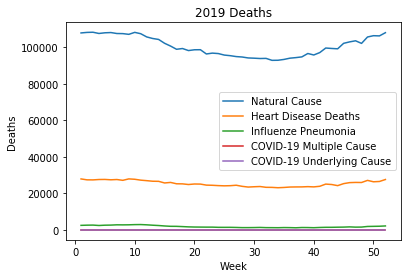

In [161]:
death2019 = week1_2019disease[['All Cause', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J10-J18)']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Deaths')
ax1.set_xlabel('Week')
ax1.set_title('2019 Deaths')
plt.plot(week1_2019disease['Natural Cause'], label="Natural Cause")
plt.plot(week1_2019disease['Diseases of heart (I00-I09,I11,I13,I20-I51)'], label="Heart Disease Deaths")
plt.plot(week1_2019disease['Influenza and pneumonia (J10-J18)'], label="Influenze Pneumonia")
plt.plot(week1_2019disease['COVID-19 (U071, Multiple Cause of Death)'], label="COVID-19 Multiple Cause")
plt.plot(week1_2019disease['COVID-19 (U071, Underlying Cause of Death)'], label="COVID-19 Underlying Cause")
ax1.legend();
plt.savefig('Resources/2019-cdc.png')

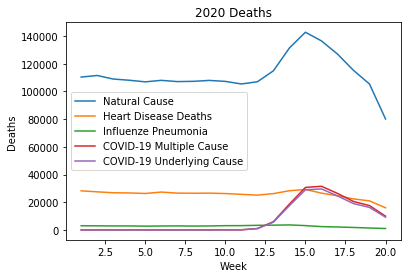

In [160]:
death2014 = week1_2020disease[['All Cause', 'Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J10-J18)']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Deaths')
ax1.set_title('2020 Deaths')
ax1.set_xlabel('Week')
plt.plot(week1_2020disease['Natural Cause'], label="Natural Cause")
plt.plot(week1_2020disease['Diseases of heart (I00-I09,I11,I13,I20-I51)'], label="Heart Disease Deaths")
plt.plot(week1_2020disease['Influenza and pneumonia (J10-J18)'], label="Influenze Pneumonia")
plt.plot(week1_2020disease['COVID-19 (U071, Multiple Cause of Death)'], label="COVID-19 Multiple Cause")
plt.plot(week1_2020disease['COVID-19 (U071, Underlying Cause of Death)'], label="COVID-19 Underlying Cause")
ax1.legend();
plt.savefig('Resources/2020-cdc.png')